In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import re
from IPython.core.display import display, HTML
from bs4 import BeautifulSoup
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from urllib.request import Request, urlopen

In [2]:
import pickle
from collections import defaultdict 

In [129]:
# URL for specific Coffee
url = 'https://www.coffeereview.com/review/trust-the-process-full-natural/'
req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})

# Read into a soup variable
webpage = urlopen(req).read()
soup = BeautifulSoup(webpage, 'html')

# Find text review

roaster = soup.find('div',attrs = {'class': 'review-template'}).find_all('p')[0].text
review = soup.find('div',attrs = {'class': 'review-template'}).find_all('p')[1].text[18:]
notes = soup.find('div',attrs = {'class': 'review-template'}).find_all('p')[2].text[7:]
tldr = soup.find('div',attrs = {'class': 'review-template'}).find_all('p')[3].text[23:]

temp_dict = defaultdict(str)
temp_dict[roaster] = [review,notes, tldr]

df1 = pd.DataFrame.from_dict(temp_dict, orient='index',columns=['Review', 'Notes', 'TLDR'])

In [127]:
# URL for specific Coffee
url = 'https://www.coffeereview.com/review/kona-geisha-champagne-natural/'
req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})

# Read into a soup variable
webpage = urlopen(req).read()
soup = BeautifulSoup(webpage, 'html')

# Find text review

roaster = soup.find('div',attrs = {'class': 'review-template'}).find_all('p')[0].text
review = soup.find('div',attrs = {'class': 'review-template'}).find_all('p')[1].text[18:]
notes = soup.find('div',attrs = {'class': 'review-template'}).find_all('p')[2].text[7:]
tldr = soup.find('div',attrs = {'class': 'review-template'}).find_all('p')[3].text[23:]

temp_dict = defaultdict(str)
temp_dict[roaster] = [review,notes, tldr]

df2 = pd.DataFrame.from_dict(temp_dict, orient='index',columns=['Review', 'Notes', 'TLDR'])
df2

,Review,Notes,TLDR
Paradise Roasters,"Deeply, delicately aromatic, high-toned. Straw...",Produced by Doug McKenna of Kona Geisha Farm ...,A coffee of the celebrated Geisha variety grow...


In [147]:
soup.find('div',attrs = {'class': 'review-template'}).find_all('p')[1].text.partition(': ')[2]

'Fresh and spicy. Dark chocolate, walnut, citrus zest, hints of cinnamon and narcissus-like flowers in aroma and cup. Dryish, vibrant acidity; lively, silky mouthfeel. Chocolate, walnut, citrus all carry into a crisp, clean finish. '

In [150]:
# URL for specific Coffee
url = url_list[2000]
req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})

# Read into a soup variable
webpage = urlopen(req).read()
soup = BeautifulSoup(webpage, 'html')

# Find text review

roaster = soup.find('div',attrs = {'class': 'review-template'}).find_all('p')[0].text
review = soup.find('div',attrs = {'class': 'review-template'}).find_all('p')[1].text.partition(': ')[2]
notes = soup.find('div',attrs = {'class': 'review-template'}).find_all('p')[2].text.partition(': ')[2]
tldr= soup.find('div',attrs = {'class': 'review-template'}).find_all('p')[3].text.partition(': ')[2]

temp_dict = defaultdict(str)
temp_dict[roaster] = [review,notes, tldr]

check = pd.DataFrame.from_dict(temp_dict, orient='index',columns=['Review', 'Notes', 'TLDR'])
check

,Review,Notes,TLDR
JBC Coffee Roasters,"Fresh and spicy. Dark chocolate, walnut, citru...",This coffee was grown by the Calderon Castillo...,"Those who value a crisp, refreshing cup, sweet..."


In [131]:
pd.concat([df1,df2])

,Review,Notes,TLDR
Red Rooster Coffee Roaster,"Delicate, deep; complex. Pomegranate, macadami...",This coffee earned the highest rating in a cup...,An intricately original natural-processed Colo...
Paradise Roasters,"Deeply, delicately aromatic, high-toned. Straw...",Produced by Doug McKenna of Kona Geisha Farm ...,A coffee of the celebrated Geisha variety grow...


In [181]:
# URL for specific Coffee
url = 'https://www.coffeereview.com/review/kona-geisha-champagne-natural/'
req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})

# Read into a soup variable
webpage = urlopen(req).read()
soup = BeautifulSoup(webpage, 'html')

# Find Coffee Details
details = soup.find('div',attrs = {'class':'column col-1'}).find_all('td')
details
# Find Coffee Scores

scores = soup.find('table',attrs = {'class':'review-template-table'}).find_all('td')
scores

# Find text review
review = soup.find('div',attrs = {'class': 'review-template'}).find_all('p')[1]
review

print(details)

[]


In [82]:
soup.find('div', attrs={'class':'column col-1'}).find('span', attrs={'class':'review-template-rating'}).text

'93'

In [183]:
categories = soup.find_all('table',attrs = {'class':'review-template-table'})[0].find_all('td')[0::2]+soup.find_all('table',attrs = {'class':'review-template-table'})[1].find_all('td')[0::2]
scores = soup.find_all('table',attrs = {'class':'review-template-table'})[0].find_all('td')[1::2]+soup.find_all('table',attrs = {'class':'review-template-table'})[1].find_all('td')[1::2]
y = [cat.get_text().partition(':')[0] for cat in categories]
x = [score.get_text() for score in scores]
print(y)
print(x)

['Roaster Location', 'Coffee Origin', 'Roast Level', 'Agtron', 'Est. Price', 'Review Date', 'Aroma', 'Acidity\n\t\t\t\t\t\t\t\t/Structure\t\t\t\t\t\t\t', 'Body', 'Flavor', 'Aftertaste']
['Minneapolis, Minnesota', 'Kealakekua, Kona, Big Island of Hawaii', 'Light', '64/84', '$74.95/4 ounces', 'January 2021', '9', '9', '9\t\t\t\t\t\t', '9', '9']


In [3]:
# URL for specific Coffee
search = 'https://www.coffeereview.com/advanced-search/'
req = Request(search, headers={'User-Agent': 'Mozilla/5.0'})

# Read into a soup variable
webpage = urlopen(req).read()
searchsoup = BeautifulSoup(webpage, 'html')

tables = searchsoup.find_all('div',attrs={'class':'review-template'})

url_list =[]
for i in range(len(tables)):
    url_list = url_list + ['https://www.coffeereview.com'+ tables[i].find('div',attrs={'class':'row row-3'}).find('a').get('href')]

for i in range(2,299):
    temp_search = 'https://www.coffeereview.com/advanced-search/?pg='+str(i)
    temp_req = Request(temp_search, headers={'User-Agent': 'Mozilla/5.0'})
    
    # Read into a soup variable
    temp_webpage = urlopen(temp_req).read()
    temp_soup = BeautifulSoup(temp_webpage, 'html')
    
    temp_tables = temp_soup.find_all('div',attrs={'class':'review-template'})
    
    for j in range(len(temp_tables)):
        url_list = url_list + ['https://www.coffeereview.com'+ temp_tables[j].find('div',attrs={'class':'row row-3'}).find('a').get('href')]

url_list

['https://www.coffeereview.com/review/costa-rica-anaerobic-2',
 'https://www.coffeereview.com/review/rwanda-triple-washed',
 'https://www.coffeereview.com/review/trust-the-process-full-natural',
 'https://www.coffeereview.com/review/colombia-finca-el-caucho-pink-bourbon',
 'https://www.coffeereview.com/review/colombia-antioquia-natural-carbonic-maceration-caturra',
 'https://www.coffeereview.com/review/colombia-la-gallera-estate',
 'https://www.coffeereview.com/review/colombia-pink-bourbon-pink-lemonade-collaboration',
 'https://www.coffeereview.com/review/colombia-finca-el-paraiso',
 'https://www.coffeereview.com/review/aces-la-juntas',
 'https://www.coffeereview.com/review/colombia-finca-potosi',
 'https://www.coffeereview.com/review/finca-la-maria-geisha-natural-2',
 'https://www.coffeereview.com/review/colombia-java-el-eden-limited-edition',
 'https://www.coffeereview.com/review/colombia-diofanor-ruiz',
 'https://www.coffeereview.com/review/bright-minds',
 'https://www.coffeereview

In [4]:
with open('coffee_urls.pickle', 'wb') as to_write:
    pickle.dump(url_list, to_write)

In [155]:
coffee = pd.DataFrame()
for link in url_list:
    req = Request(link, headers={'User-Agent': 'Mozilla/5.0'})

    # Read into a soup variable
    webpage = urlopen(req).read()
    soup = BeautifulSoup(webpage, 'html')
    try:
        roaster = soup.find('div',attrs = {'class': 'review-template'}).find_all('p')[0].text
    except AttributeError:
        roaster = ''
    try:
        review = soup.find('div',attrs = {'class': 'review-template'}).find_all('p')[1].text.partition(': ')[2]
    except AttributeError:
        review = ''
    try:
        notes = soup.find('div',attrs = {'class': 'review-template'}).find_all('p')[2].text.partition(': ')[2]
    except AttributeError:
        notes = ''
    try:
        tldr = soup.find('div',attrs = {'class': 'review-template'}).find_all('p')[3].text.partition(': ')[2]
    except AttributeError:
        tldr = ''
    
    temp_dict = defaultdict(str)
    temp_dict[roaster] = [review,notes, tldr]

    coffee = pd.concat([coffee,pd.DataFrame.from_dict(temp_dict, orient='index',columns=['Review', 'Notes', 'TLDR'])])
coffee.head(10)

,Review,Notes,TLDR
Red Rooster Coffee Roaster,"Delicate, deep; complex. Pomegranate, macadami...",This coffee earned the highest rating in a cup...,An intricately original natural-processed Colo...
Paradise Roasters,"Very sweet, floral-toned. Freesia, pink grapef...",This coffee tied for the second-highest rating...,A sweetly evocative presentation of Colombia P...
Kakalove Cafe,"Opulent, richly sweet-tart-savory. Black curra...",This coffee tied for the second-highest rating...,"A rich, complex, decadently sweet cup processe..."
Evie's Cafe,"Gently bright, richly floral. Raspberry, dark ...",Produced by Jose Juaquin of La Gallera Estate ...,A honey-processed Colombia with the vibrant sw...
Badbeard’s Microroastery,"Sweetly tart, floral-driven. Honeysuckle, vani...",Produced by Jose Ortiz of Finca El Danubio fro...,"A crisp, delicate yet confident Colombia cup —..."
Dory Coffee Roasters,"Chocolaty, deeply sweet-savory. Dark chocolate...",Produced by Diego Samuel Bermudez Tapia of the...,Processed by an experimental anaerobic ferment...
JBC Coffee Roasters,"Berry- and chocolate-toned. Strawberry, baking...",Produced by Diever Galindez entirely from tree...,"A lively, crisply chocolaty and sweetly berry-..."
modcup coffee,"Caramel- and floral-toned. Salted caramel, lil...",Produced at Finca Potosi from trees of the Cat...,"A rich, delicately floral Colombia cup with su..."
Blues Brew Coffee,"Deeply pungent, sweetly savory. Dark chocolate...",Produced by the Taborda Cortez family entirely...,"A rich, resonant natural-processed cup with pr..."
Brioso Coffee,"Explosively floral, tropical. Star jasmine, da...",Produced by Elias & Shady Bayter of the Vergel...,"A deep, complex Colombia processed by an elabo..."


In [66]:
with open('coffee_words.pickle', 'wb') as to_write:
    pickle.dump(coffee, to_write)

In [61]:
with open('coffee_words.pickle','rb') as read_file:
    coffee = pickle.load(read_file)
# coffee = coffee.reset_index().rename(columns={'index':'Roaster'})

In [8]:
coffee[(coffee.Review == '')|(coffee.Notes == '')]

,Roaster,Review,Notes,TLDR
1689,Studio Confluence,"Roundly rich, subtly sweet. Grapefruit zest, h...",,
2124,AHRIRE Roasting,"Gentle and roundly bright, quietly intricate. ...",,
2250,Allegro Coffee Roasters,"Crisply sweet, giddily lively. Complex flowers...",,"A particularly fine, floral-toned version of t..."
5466,Silver Canyon Coffee,,,"Acid-avoiders who enjoy heavy, bittersweet dri..."


In [64]:
coffee = coffee.reset_index().rename(columns={'index':'Roaster'})

In [ ]:
# overall = pd.DataFrame()
# counter=0
# for link in url_list:
#     req = Request(link, headers={'User-Agent': 'Mozilla/5.0'})

#     # Read into a soup variable
#     webpage = urlopen(req).read()
#     soup = BeautifulSoup(webpage, 'html')
    
#     try:
#         roaster = soup.find('div',attrs = {'class': 'review-template'}).find_all('p')[0].text
#     except AttributeError:
#         roaster = ''
#     num = soup.find('div', attrs={'class':'column col-1'}).find('span', attrs={'class':'review-template-rating'}).text

In [86]:
ratings = pd.DataFrame()
counter=0
for link in url_list:
    req = Request(link, headers={'User-Agent': 'Mozilla/5.0'})

    # Read into a soup variable
    webpage = urlopen(req).read()
    soup = BeautifulSoup(webpage, 'html')
    try:
        roaster = soup.find('div',attrs = {'class': 'review-template'}).find_all('p')[0].text
    except AttributeError:
        roaster = ''
    
    # Scrape the categories and values for each
    # Overall score
    num = soup.find('div', attrs={'class':'column col-1'}).find('span', attrs={'class':'review-template-rating'}).text
    # Categories
    categories = soup.find_all('table',attrs = {'class':'review-template-table'})[0].find_all('td')[0::2]+soup.find_all('table',attrs = {'class':'review-template-table'})[1].find_all('td')[0::2]
    # Scores and values
    scores = soup.find_all('table',attrs = {'class':'review-template-table'})[0].find_all('td')[1::2]+soup.find_all('table',attrs = {'class':'review-template-table'})[1].find_all('td')[1::2]
    y = ['Overall']+[cat.get_text().partition(':')[0] for cat in categories]
    x = [num]+[score.get_text() for score in scores]

    temp_dict = defaultdict(str)
    temp_dict[roaster] = x

    ratings = pd.concat([ratings,pd.DataFrame.from_dict(temp_dict, orient='index',columns=y)])
    counter += 1
    if counter%25==0:
        print(counter)
ratings

25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400
425
450
475
500
525
550
575
600
625
650
675
700
725
750
775
800
825
850
875
900
925
950
975
1000
1025
1050
1075
1100
1125
1150
1175
1200
1225
1250
1275
1300
1325
1350
1375
1400
1425
1450
1475
1500
1525
1550
1575
1600
1625
1650
1675
1700
1725
1750
1775
1800
1825
1850
1875
1900
1925
1950
1975
2000
2025
2050
2075
2100
2125
2150
2175
2200
2225
2250
2275
2300
2325
2350
2375
2400
2425
2450
2475
2500
2525
2550
2575
2600
2625
2650
2675
2700
2725
2750
2775
2800
2825
2850
2875
2900
2925
2950
2975
3000
3025
3050
3075
3100
3125
3150
3175
3200
3225
3250
3275
3300
3325
3350
3375
3400
3425
3450
3475
3500
3525
3550
3575
3600
3625
3650
3675
3700
3725
3750
3775
3800
3825
3850
3875
3900
3925
3950
3975
4000
4025
4050
4075
4100
4125
4150
4175
4200
4225
4250
4275
4300
4325
4350
4375
4400
4425
4450
4475
4500
4525
4550
4575
4600
4625
4650
4675
4700
4725
4750
4775
4800
4825
4850
4875
4900
4925
4950
4975
5000
5025
5050
5075
5100
5125
5150
5175
5200
52

,Overall,Roaster Location,Coffee Origin,Roast Level,Agtron,Est. Price,Review Date,Aroma,Acidity\n\t\t\t\t\t\t\t\t/Structure\t\t\t\t\t\t\t,Body,Flavor,Aftertaste,With Milk,Acidity\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t
Jackrabbit Java,93,"Thermopolis, Wyoming",Costa Rica,Medium-Light,54/72,$20.00/12 ounces,February 2021,9,8,9\t\t\t\t\t\t,9,8,NaN,NaN
Jackrabbit Java,92,"Thermopolis, Wyoming","Nyamasheke District, Rwanda",Medium-Light,58/76,$20.00/12 ounces,February 2021,9,8,8\t\t\t\t\t\t,9,8,NaN,NaN
Red Rooster Coffee Roaster,96,"Floyd, Virginia","Los Naranjos, La Argentina, Huila Department, ...",Light,64/84,$18.99/8 ounces,February 2021,9,9,9\t\t\t\t\t\t,10,9,NaN,NaN
Paradise Roasters,95,"Minneapolis, Minnesota","Huila, Colombia",Light,62/80,$16.95/6 ounces,February 2021,9,9,9\t\t\t\t\t\t,9,9,NaN,NaN
Kakalove Cafe,95,"Chia-Yi, Taiwan","Antioquia Department, Colombia",Medium-Light,60/80,NT $310/8 ounces,February 2021,9,9,9\t\t\t\t\t\t,9,9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Coffee Beanery,83,"Flushing, Michigan",NaN,Medium-Light,63/72,NaN,February 1997,8,NaN,7\t\t\t\t\t\t,7,NaN,NaN,7
Starbucks Coffee,81,"Seattle, Washington",NaN,Dark,37/41,NaN,February 1997,7,NaN,6\t\t\t\t\t\t,8,NaN,NaN,5
Peerless Coffee,75,"Oakland, California",NaN,Medium,54/61,NaN,February 1997,6,NaN,6\t\t\t\t\t\t,5,NaN,NaN,5
Gevalia,74,"Des Moines, Iowa",NaN,Light,68/81,NaN,February 1997,7,NaN,6\t\t\t\t\t\t,6,NaN,NaN,8


In [96]:
with open('coffee_ratings.pickle', 'wb') as to_write:
    pickle.dump(ratings, to_write)

In [31]:
with open('coffee_ratings.pickle','rb') as read_file:
    ratings = pickle.load(read_file)
# ratings = ratings.reset_index().rename(columns={'index':'Roaster'})

In [97]:
ratings.columns

Index(['Overall', 'Roaster Location', 'Coffee Origin', 'Roast Level', 'Agtron',
       'Est. Price', 'Review Date', 'Aroma', 'Body', 'Flavor', 'Aftertaste',
       'Acidity'],
      dtype='object')

In [88]:
ratings['Acidity'] = ratings['Acidity\n\t\t\t\t\t\t\t\t/Structure\t\t\t\t\t\t\t'].where(ratings['Acidity\n\t\t\t\t\t\t\t\t/Structure\t\t\t\t\t\t\t'].isnull()==0,ratings['Acidity\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t'])
ratings = ratings.drop(columns=['Acidity\n\t\t\t\t\t\t\t\t/Structure\t\t\t\t\t\t\t','Acidity\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t','With Milk'])
ratings.Body = ratings.Body.str.partition('\t')[0]

In [93]:
ratings.head(10)

,Overall,Roaster Location,Coffee Origin,Roast Level,Agtron,Est. Price,Review Date,Aroma,Body,Flavor,Aftertaste,Acidity
Jackrabbit Java,93,"Thermopolis, Wyoming",Costa Rica,Medium-Light,54/72,$20.00/12 ounces,February 2021,9,9,9,8,8
Jackrabbit Java,92,"Thermopolis, Wyoming","Nyamasheke District, Rwanda",Medium-Light,58/76,$20.00/12 ounces,February 2021,9,8,9,8,8
Red Rooster Coffee Roaster,96,"Floyd, Virginia","Los Naranjos, La Argentina, Huila Department, ...",Light,64/84,$18.99/8 ounces,February 2021,9,9,10,9,9
Paradise Roasters,95,"Minneapolis, Minnesota","Huila, Colombia",Light,62/80,$16.95/6 ounces,February 2021,9,9,9,9,9
Kakalove Cafe,95,"Chia-Yi, Taiwan","Antioquia Department, Colombia",Medium-Light,60/80,NT $310/8 ounces,February 2021,9,9,9,9,9
Evie's Cafe,94,"Chia-Yi, Taiwan","Tolima Department, Colombia",Light,64/84,NT $620/8 ounces,February 2021,9,9,9,8,9
Badbeard’s Microroastery,93,"Portland, Oregon","Huila, Colombia",Medium-Light,56/74,$18.95/16 ounces,February 2021,9,9,9,8,8
Dory Coffee Roasters,93,"Taipei, Taiwan","Cauca, Colombia",Medium-Light,58/79,NT $600/230 grams,February 2021,9,9,9,8,8
JBC Coffee Roasters,93,"Madison, Wisconsin","Chinas, San Agustín, Huila, Colombia",Light,60/82,$18.65/8 ounces,February 2021,9,8,9,8,9
modcup coffee,93,"Jersey City, New Jersey","Valle de Cauca, Colombia",Light,64/83,$20.00/12 ounces,February 2021,9,9,9,8,8


In [94]:
coffee.shape

(5959, 4)

In [95]:
ratings.shape

(5959, 12)

In [101]:
coffee.sample(5)

,Roaster,Review,Notes,TLDR
2406,Victrola Coffee Roasters,"Soft, rich, deep. Complex floral-related notes...",Produced by the Hinga Kawa Women’s Association...,"This sweet, deep, floral-toned cup, particular..."
1445,Kakalove Cafe,"Evaluated as espresso. Deeply floral, chocolat...",This exceptional coffee was selected as the No...,"A deeply rich, sweet-tart shot, driven by flor..."
1533,Mystic Monk Coffee,"Sweetly roast-toned, chocolaty. Dark chocolate...","A blend of coffees from Africa, Indonesia and ...",A fine holiday blend for those who favor darke...
271,Origin Coffee Roasters,"Richly sweet-savory, cocoa-toned. Cocoa nib, p...",Produced by Miles Mayne of Silver Cloud Farm e...,An umami undercurrent (think candycap mushroom...
968,Barrington Coffee Roasting,"Bright, crisply sweet-savory. Black currant, h...",This coffee is available exclusively as a part...,A confident Kenya with a classic cup profile: ...


In [129]:
scores = ratings[ratings.Overall != 'NR'].Overall.astype(int)
scores.shape

(5954,)

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

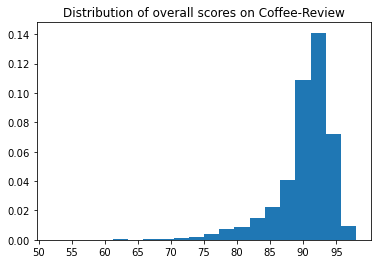

In [134]:
plt.hist(sorted(scores), bins=20,density=True)
plt.xticks(np.arange(50,100,5))
plt.title('Distribution of overall scores on Coffee-Review')
plt.show();